In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import  PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [5]:
# 1.加载数据
iris = load_iris()
iris.data.shape

(150, 4)

In [60]:
# 特征维数
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
Y = iris.target
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


### 二维特征

In [49]:
# 2.数据建模
pca = PCA(n_components=2)
new_X = pca.fit_transform(X)
pd.DataFrame(new_X)

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


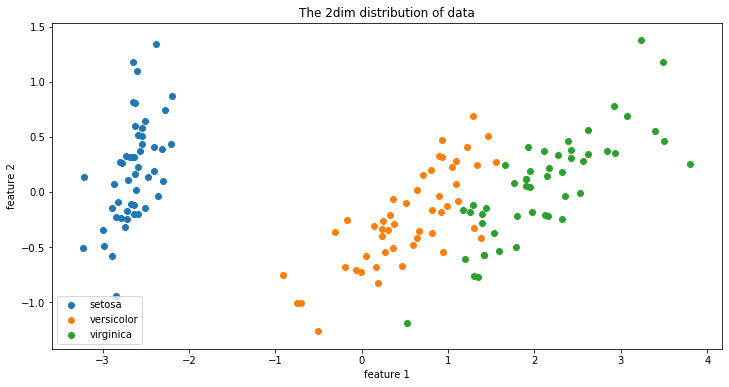

In [50]:
# 3.画个图(二维数据)
plt.figure(figsize=(12, 6))
plt.scatter(new_X[Y == 0, 0], new_X[Y==0, 1], label = iris.target_names[0])
plt.scatter(new_X[Y == 1, 0], new_X[Y==1, 1], label = iris.target_names[1])
plt.scatter(new_X[Y == 2, 0], new_X[Y==2, 1], label = iris.target_names[2])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.title("The 2dim distribution of data")
plt.savefig("imgs/2dim.png")
plt.show()

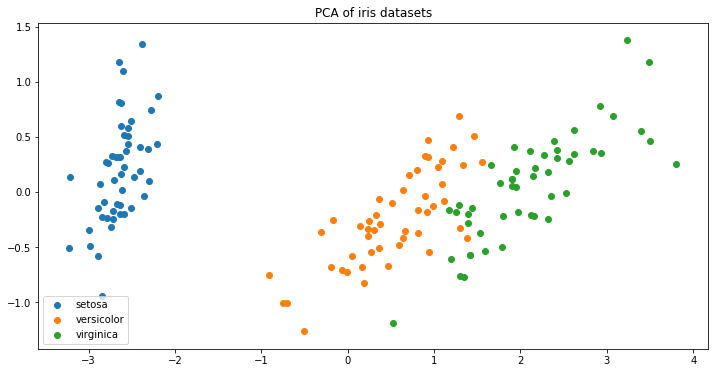

In [51]:
plt.figure(figsize=(12, 6))
for i in [0, 1, 2]:
    plt.scatter(new_X[Y == i, 0]
                , new_X[Y == i, 1]
                , label = iris.target_names[i])
plt.legend()
plt.title("PCA of iris datasets")
plt.show()  

#### 探索数据的本质

In [52]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [53]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

### 三维特征

In [54]:
pca = PCA(n_components=3)
pca = pca.fit_transform(X)
new_X = pca
pd.DataFrame(pca)

,0,1,2
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


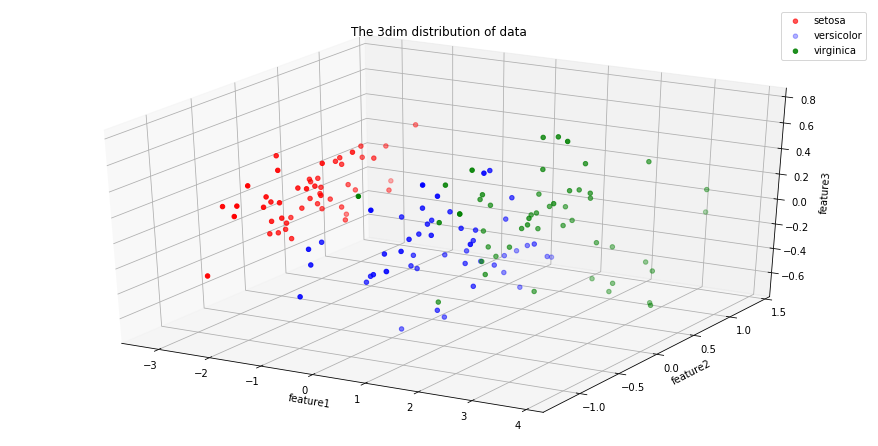

In [57]:
fig1 = plt.figure(figsize=(12, 6))
ax = Axes3D(fig1)

for i, c in enumerate(["r", "b", "g"]):
    ax.scatter(new_X[Y==i, 0]
               , new_X[Y==i, 1]
               , new_X[Y==i, 2]
               , c = c
               , label = iris.target_names[i]
              )
    
ax.set_zlabel("feature3")
ax.set_ylabel("feature2")
ax.set_xlabel("feature1")
plt.title("The 3dim distribution of data")
plt.savefig("imgs/3dim.png")
plt.legend()
plt.show()

### 一维特征

In [17]:
pca = PCA(n_components=1)
pca = pca.fit_transform(iris.data)
x_new = pca
x_new.shape
Y_data = [0] * 50

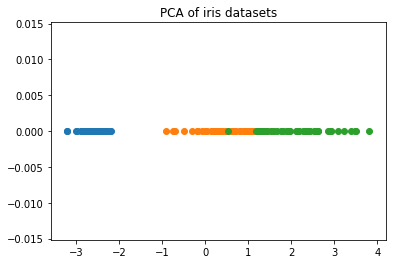

In [18]:
for i in [0, 1, 2]:
    plt.scatter(x_new[Y==i, :], Y_data)

plt.ylim()
plt.title("PCA of iris datasets")
plt.show()

### 原始维度

In [59]:
pca = PCA(n_components=4)
x_new = pca.fit_transform(iris.data)
pd.DataFrame(x_new)

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


In [20]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [21]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [23]:
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

4